We show how to translate from syntax trees, to pregroup parsing diagrams, to equivalent diagrams where all cups and caps are removed.

In [1]:
from discopy import Ty, Id, Box, Diagram, Word

# POS TAGS:
s, n, adj, v, vp = Ty('S'), Ty('N'), Ty('ADJ'), Ty('V'), Ty('VP')

# WORDS:
Jane = Word('Jane', n)
loves = Word('loves', v)
funny =  Word('funny', adj)
boys = Word('boys', n)

vocab = [Jane, loves, funny, boys]

## Syntax trees

Two syntax trees for sentence 'Jane loves funny boys':


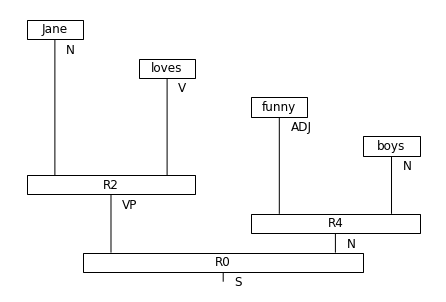

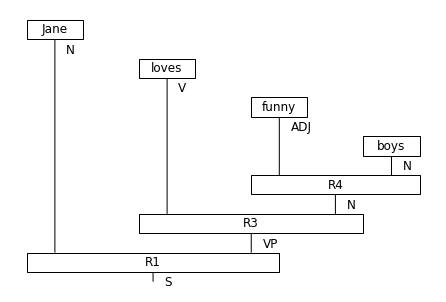

<AxesSubplot:>

In [2]:
# The CFG's production rules are boxes.

R0 = Box('R0', vp @ n, s)
R1 = Box('R1', n @ vp, s)
R2 = Box('R2', n @ v , vp)
R3 = Box('R3', v @ n , vp)
R4 = Box('R4', adj @ n, n)

# A syntax tree is a diagram!

tree0 = R2 @ R4 >> R0
tree1 = Id(n @ v) @ R4 >> Id(n) @ R3 >> R1
sentence0 = Jane @ loves @ funny @ boys >> tree0
sentence1 = Jane @ loves @ funny @ boys >> tree1
print("Two syntax trees for sentence 'Jane loves funny boys':")
sentence0.draw(aspect='auto')
sentence1.draw(aspect='auto')

## Pregroup parsing

The syntax trees are mapped to pregroup diagrams, equivalent up to interchanger:


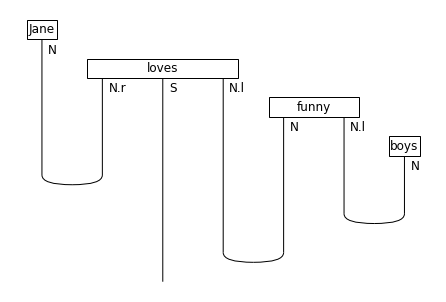

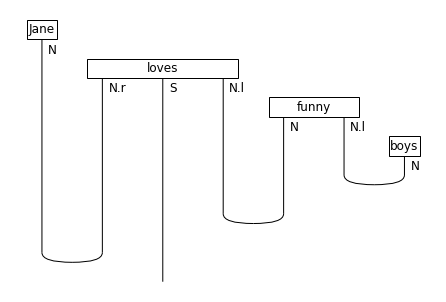

<AxesSubplot:>

In [3]:
from discopy.rigid import Cup, Cap, Functor

# Dict from POS tags to Pregroup types:
ob = {n : n, s: s, adj: n @ n.l, v: n.r @ s @ n.l, vp: s @ n.l}

_Jane = Word('Jane', n)
_loves = Word('loves', n.r @ s @ n.l)
_funny =  Word('funny', n @ n.l)
_boys = Word('boys', n)

# Dict from CFG rules to Pregroup reductions: 
ar = {R0: Id(s) @ Cup(n.l, n), 
      R2: Cup(n, n.r) @ Id(s @ n.l),
      R4: Id(n) @ Cup(n.l, n),
      R3: Id(n.r @ s) @ Cup(n.l, n),
      R1: Cup(n, n.r) @ Id(s),
      Jane: _Jane, loves: _loves, funny: _funny, boys: _boys}
 
T2P = Functor(ob, ar)
print("The syntax trees are mapped to pregroup diagrams, equivalent up to interchanger:")
T2P(sentence0).draw(aspect='auto')
T2P(sentence1).draw(aspect='auto')

In [4]:
# Check that the two diagrams above are equal up to monoidal.normal_form()

assert T2P(sentence0).normal_form() == T2P(sentence0).normal_form()

## Snake removal

Image of the wiring functor:


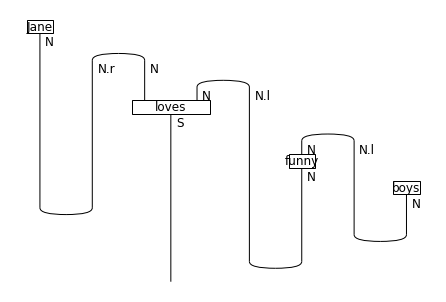

<AxesSubplot:>

In [5]:
# Define the Wiring functor that decomposes a word into monoidal boxes with inputs transposed:

love_box = Box('loves', n @ n, s)
funny_box = Box('funny', n, n)

ob = {n: n, s: s}
ar = {_Jane: _Jane, _boys: _boys,
      _loves: Cap(n.r, n) @ Cap(n, n.l) >> Diagram.id(n.r) @ love_box @ Diagram.id(n.l), 
      _funny: Cap(n, n.l) >> funny_box @ Id(n.l)}

W = Functor(ob, ar)
print('Image of the wiring functor:')
W(T2P(sentence0)).draw(aspect='auto')

In [6]:
rewrite_steps = W(T2P(sentence0)).normalize()
print("Equivalent diagram for 'Jane loves funny boys', after snake removal:")
T2P(sentence0).to_gif(*rewrite_steps, path='../docs/imgs/jane_boys.gif', aspect='auto')

Equivalent diagram for 'Jane loves funny boys', after snake removal:
